#### First the Required Libraries should  be Imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the Data

In [2]:
titanic = pd.read_csv("titanic_train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA (Exploratory Data Analysis)

In [4]:
titanic.shape

(891, 12)

#### Missing Data

In [5]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

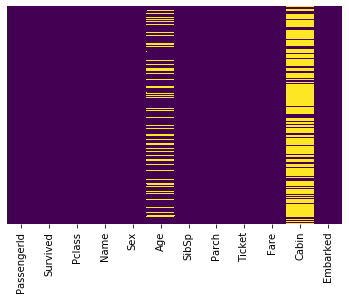

In [7]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

From the numeric figures and through the visualization we can say that approx. 20% of the data from 'Age' and 77% of data from 'Cabin' is missing.
So we have to see that how we are going to treat it.

Here, we do some more exploration through the visualization

Like, first we see that how many Passangers have Survived and how many have died

In [8]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

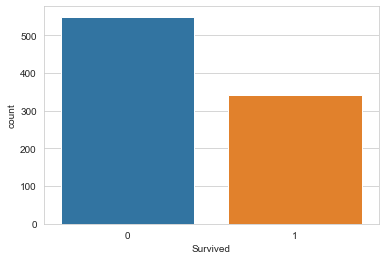

In [9]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", data=titanic)

Here '0' represents the passangers who died and '1' represents the 'Survived'.

In [10]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

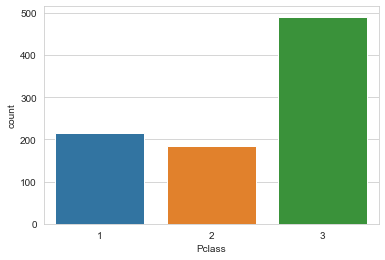

In [11]:
sns.set_style('whitegrid')
sns.countplot(x="Pclass", data=titanic)

So, here we come to know that Highest number of passangers were travelling in 3rd Class of Titanic then 1st Class and least number of passangers in 2nd Class.

In [12]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

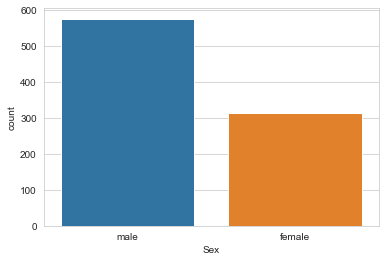

In [13]:
sns.set_style('whitegrid')
sns.countplot(x="Sex", data=titanic)

Here, we are witnessing the Total number of Male and Female passangers.

It's okay that we have the numbers of Male and Female Passangers and we also see it visually.

But if we want to know that how many males and females have Died and Survived ?

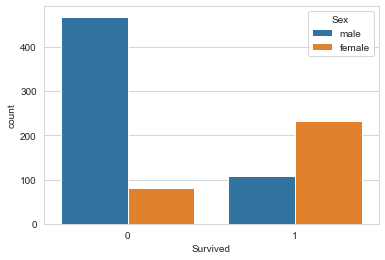

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic)

So, it is very clear through the Visualization that the percentage of Female survivor are more than the Males.

Now after seeing that there is more Female survivors than Male, we can see that most of the survivors are from which 
Passanger Class

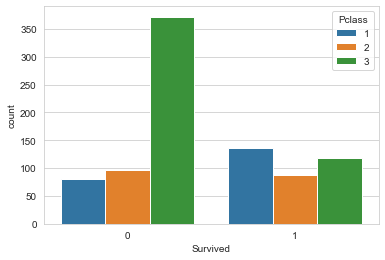

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic)

It is very much visible that high percentage of people from 1st Class Survived then 3rd Class and least from 2nd Class

In [16]:
titanic['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

As it is a Numerical Data we have to use the Histogram instead of Bar Plot.

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


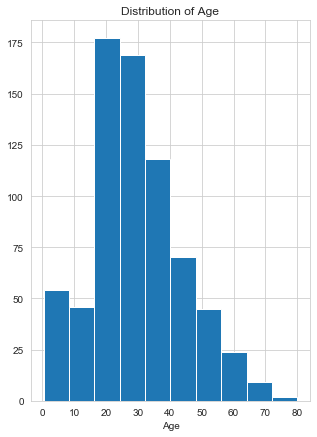

In [17]:
plt.figure(figsize=(5,7))
plt.hist(titanic['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

We can say that most of the people who Survived are between the Age group of 20 and 30.

It's OK that most who survived the accident were of age group 20 and 30, but what is the actual distribution of Age of the passangers on the ship(Titanic).

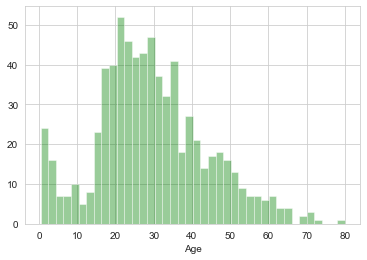

In [18]:
sns.distplot(titanic['Age'].dropna(), kde=False, color='green', bins=40)

Even from theDistribution Plot we can say that most ogf the Passangers belong to the Age group of 20 and 30 

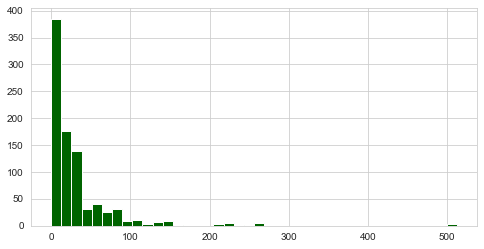

In [19]:
titanic['Fare'].hist(color='darkgreen', bins=40, figsize=(8,4))

### Describing Data

In [20]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Outcomes of Described Data:

Total numbers of rows and columns in dataset:

 1. 891 Rows 
 2. 12 Columns
 
Age:

 1. Max 80
 2. Min 0.42
 3. Mean 29.699
 4. SD 14.526
 
Fare:

 1. Max 512.329
 2. Min 0.0000
 3. Mean 32.2042
 4. SD 49.6934

In [21]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


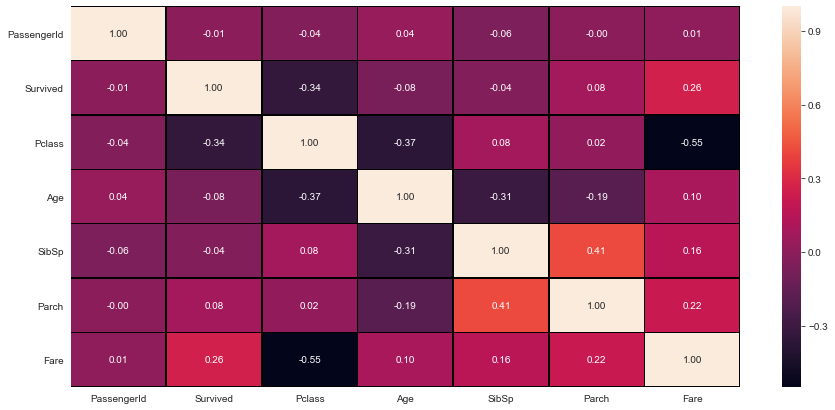

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(titanic.corr(), annot=True, linewidths=0.5, linecolor="black", fmt='.2f')

### DATA CLEANING

Now, as we have seen earlier that  there are two columns of concern that has missing values and one of them is AGE which is importnat for us.

Generally, we impute the NA values with the MEAN of the columns. But since here we have three category of people who belongs to different Passanger Classes. It would be wiser if we impute the values with the MEAN of there respective Pclass.

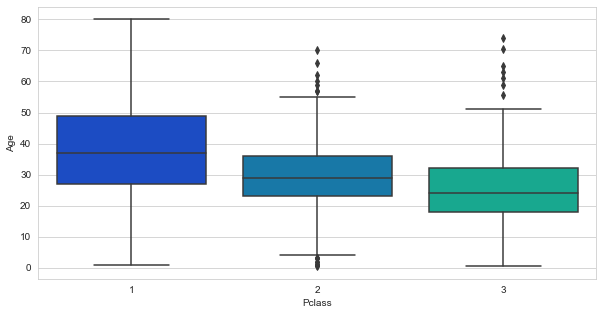

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='winter')

So, from above Boxplots we can say that the Mean Age of Class1 Passangers are around 37 Years, similarly of Class2 Passangers are approx.29 Years, and of 3rd Class Passangers are around 24 Years.

So, now we impute the Mean values of Age according to the Passanger's class. For that we have to write a function

In [24]:
def impute_age(cols):
    Age=cols[0]
    Pclass=[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

Time to apply the Function

In [25]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis=1) 

Now, we check the Heatmap again which we have made earlier to see that whether our Missing values got filled or not.

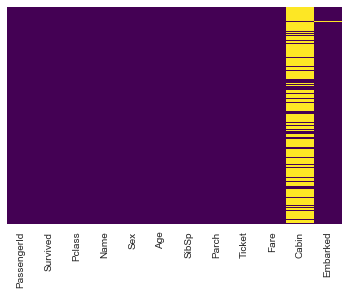

In [26]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We can see that now there is no missing value is showing in 'Age' Column.

But the Cabin column still have the missing values. And since it is too much, here I am Dropping it.

In [27]:
titanic.drop('Cabin', axis=1, inplace=True )

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


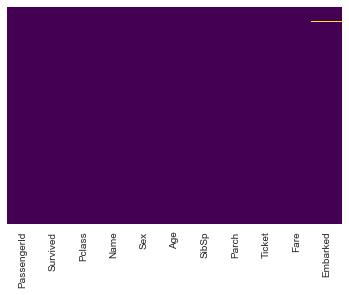

In [29]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
titanic.dropna(inplace=True)

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


We can see that now there is no column showing any missing values

#### Now, we are able to make our model but we have to see that which are the Features important for us to predict the Survival of Passangers.

One of the most important Feature is the Sex of the Passangers but it is a Categorical Data. So, first we should convert the data into numeric figures.

In [32]:
pd.get_dummies(titanic['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [33]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True)
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)

In [34]:
titanic.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [35]:
titanic = pd.concat([titanic,sex,embark], axis=1, sort=False)

In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


So, now our data is ready to model!

### Modelling with Logistic Regression 

So, let's start with splitting the data into Training and Test

#### Train - Test Split 

Before doing the split we should drop the Survived column as it is a dependent feature.

In [37]:
titanic.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [38]:
titanic['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'], test_size=0.25, 
                                                    random_state=1000)

In [41]:
print(titanic.drop('Survived', axis=1).shape, X_train.shape, X_test.shape)

(889, 9) (666, 9) (223, 9)


### Now, Train and Predict

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

C:\Users\Shekhar Sinha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predict = logReg.predict(X_test)

In [45]:
predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
accuracy = confusion_matrix(y_test, predict)

In [48]:
accuracy

array([[111,  21],
       [ 30,  61]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracyScore = accuracy_score(y_test, predict)

In [51]:
accuracyScore

0.7713004484304933

So, 77.13% is Accuracy of the Prediction by applying the Logistic Regression

### Modelling with Decision Tree Classifier

In [52]:
x_train = titanic[['Age']]
y_train = titanic[['Survived']]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'], test_size=0.30, 
                                                    random_state=1002)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc = DecisionTreeClassifier()

In [56]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
pred = dtc.predict(x_test)

In [58]:
pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
accurate = confusion_matrix(y_test, pred)

In [61]:
accurate

array([[121,  36],
       [ 21,  89]], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accurateScore = accuracy_score(y_test, pred)

In [64]:
accurateScore

0.7865168539325843

We can see that after using "Decision Tree Classifier" the accuracy score of the prediction increased to 78.65%